## Dawood Sarfraz

## Sentimental Analysis 
### Support Vector Machine
### Random Forest
### Decision Tree
### XGBoost
### Logistic Regression

## Performed Feature Engineering 

#### About Dataset
Context
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

#### Content
It contains the following 6 fields:

#### target: 
The polarity of the tweet (0 = negative, 4 = positive)

#### ids: 
The id of the tweet ( 2087)

#### date: 
The date of the tweet (Sat May 16 23:58:44 UTC 2009)

#### flag: 
The query (lyx). If there is no query, then this value is NO_QUERY.

#### user: 
The user that tweeted (robotickilldozr)

#### text: 
The text of the tweet (Lyx is cool)

In [616]:
# This Library is Just for Calculte Ruuning Time of Notebook
from datetime import datetime
start_time = datetime.now()
end_time = datetime.now()
total_time = end_time - start_time

In [617]:
ls

 nltk_data/                                 trained_Model.sav
'Screenshot from 2024-06-30 01-59-16.png'   tweets.csv
'Sentimental Analysis.ipynb'                tweets.zip
 trained_Model_logistic_regression.sav


In [618]:
# mostly we get dataset into Zip file Here is code to extact 

from zipfile import ZipFile as zf

dataset_file = "tweets.zip"

with zf(dataset_file, "r") as zip:
    zip.extractall()
    print(f"{dataset_file} has extacted start your project.")

tweets.zip has extacted start your project.


In [619]:
ls

 nltk_data/                                 trained_Model.sav
'Screenshot from 2024-06-30 01-59-16.png'   tweets.csv
'Sentimental Analysis.ipynb'                tweets.zip
 trained_Model_logistic_regression.sav


In [620]:
# Importing Useful Libraries

In [621]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Natural Language Tool Kit library for text processing
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Downloading "Stopworks"
import nltk
nltk.download("stopwords")

# Import Sklean library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

print('The nltk version using {}.'.format(nltk.__version__))
print('The scikit-learn version using {}.'.format(sklearn.__version__))



The nltk version using 3.8.1.
The scikit-learn version using 1.4.2.


[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [622]:
print(stopwords.words('english')) # As my data set is in English so im using "english"

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [623]:
tweets_data = pd.read_csv("tweets.csv",encoding="ISO-8859-1")
original_data = pd.read_csv("tweets.csv",encoding="ISO-8859-1")

In [624]:
rows, columns = tweets_data.shape

In [625]:
print(f"{rows} are total rows in {dataset_file}")

1599999 are total rows in tweets.zip


In [626]:
print(f"{columns} are total columns in {dataset_file}")

6 are total columns in tweets.zip


In [627]:
tweets_data

,Target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


#### If no lables so Assigning column names

In [629]:
#column_names = ["Target", "ids","date", "flag", "user", "text"]

In [630]:
tweets_data.sample(10)

,Target,ids,date,flag,user,text
1427351,4,2059381010,Sat Jun 06 16:49:06 PDT 2009,NO_QUERY,official_roxy_j,Im back soo tweet me
961269,4,1827030251,Sun May 17 09:50:35 PDT 2009,NO_QUERY,m4s,@Evelyncharmz
790898,0,2325798140,Thu Jun 25 06:04:48 PDT 2009,NO_QUERY,xoxWENDYxox,The lil lion cried after I dropped him off in ...
396033,0,2056256111,Sat Jun 06 10:48:45 PDT 2009,NO_QUERY,Pixie_Anna,@Uk_joedan_fan Thanks. She's seeing the neurol...
126930,0,1834618006,Mon May 18 03:36:56 PDT 2009,NO_QUERY,LeaAndLuas,"think its very hard to learn the little one, t..."
356585,0,2044323024,Fri Jun 05 09:11:24 PDT 2009,NO_QUERY,Peyton_Irving,raining today !
594501,0,2218528002,Wed Jun 17 22:38:52 PDT 2009,NO_QUERY,mollier,"@caseylynnm weird, that does suck. I still h..."
371730,0,2050504082,Fri Jun 05 18:47:15 PDT 2009,NO_QUERY,TickleMeStefy,Its not faire !! Why cant Bon Jovi come to Mon...
1362234,4,2049267461,Fri Jun 05 16:35:06 PDT 2009,NO_QUERY,_LostSoul_,@vagrantdead ty for the #followfriday playoff ...
1160689,4,1979449960,Sun May 31 03:05:52 PDT 2009,NO_QUERY,hannnahismyname,I'm playing pet society! hahaha It kills bored...


In [631]:
tweets_data.tail(10)

,Target,ids,date,flag,user,text
1599989,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599990,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599991,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599992,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599993,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [632]:
tweets_data.replace({"Target":{4:1}}, inplace = True) # Making Target 0----4 to 0----1

In [633]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [634]:
tweets_data.duplicated().sum() # Check duplicates in Data set

0

In [635]:
tweets_data.ids.duplicated().sum() # Check duplicate ids

1685

In [636]:
# Creating a new column for Length of Every tweet
tweets_data['text_length'] = tweets_data['text'].apply(len)

In [637]:
tweets_data["text_length"]

0          111
1           89
2           47
3          111
4           29
          ... 
1599994     56
1599995     81
1599996     57
1599997     65
1599998     62
Name: text_length, Length: 1599999, dtype: int64

In [638]:
max(tweets_data.text_length) # Maximum length of tweet

717

In [639]:
print(tweets_data["text"])

0          is upset that he can't update his Facebook by ...
1          @Kenichan I dived many times for the ball. Man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @Kwesidei not the whole crew 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1599999, dtype: object


In [640]:
tweets_data["text"].str.len().min() # minimum length tweet

6

In [641]:
tweets_data["text"].str.len().idxmin() # minimum length tweet inex

4232

In [642]:
tweets_data.text[tweets_data["text"].str.len().idxmin()]

' just '

In [643]:
min_value = tweets_data.text[tweets_data.text.str.len().idxmin()] # Same as above but different method

In [644]:
min_value

' just '

In [645]:
len(min_value)

6

In [646]:
max_value = tweets_data.text[tweets_data.text.str.len().idxmax()] # Same as above but different method

In [647]:
len(max_value)

717

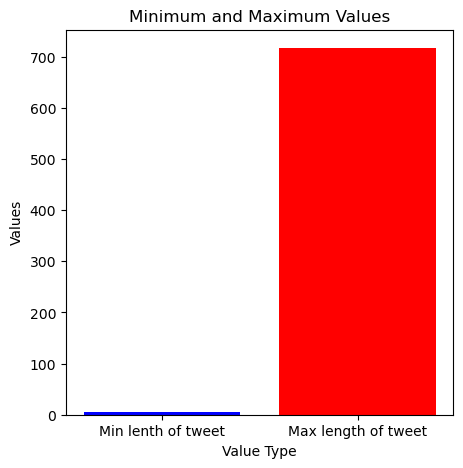

In [648]:
plt.figure(figsize=(5,5))
plt.bar(['Min lenth of tweet', 'Max length of tweet'], [len(min_value), len(max_value)], color=['blue', 'red'], )
plt.xlabel('Value Type')
plt.ylabel('Values')
plt.title('Minimum and Maximum Values')
plt.show()

In [649]:
tweets_data["text"].str.len().max() # minimum length tweet

717

In [650]:
tweets_data['text_length'] = tweets_data['text'].apply(len)
# Find the index of the maximum length
max_length_index = tweets_data['text_length'].idxmax()
# Retrieve the tweet with the maximum length
max_length_tweet = tweets_data.loc[max_length_index, 'text']
print("Tweet with maximum length: ", len(max_length_tweet),"\n")
print(max_length_tweet)

Tweet with maximum length:  717 

@catfish_ohm Ã Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¸Â²Ã Â¹ÂÃ Â¸Â«Ã Â¹ÂÃ Â¸?Ã Â¸Â²Ã Â¸Â£Ã Â¹ÂÃ Â¸ÂÃ Â¸Â¹Ã Â¸ÂÃ Â¸?Ã Â¸Â¸Ã Â¹ÂÃ Â¸Â£Ã Â¸Â°(Ã Â¸ÂªÃ Â¸Â±Ã Â¸ÂªÃ Â¹Â+Ã Â¸Â¢Ã Â¸Â¹Ã Â¸Â£Ã Â¸Â´Ã Â¹?Ã Â¸?Ã Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¹?Ã Â¸ÂÃ Â¸ÂÃ Â¸ÂÃ Â¸Â°Ã Â¸ÂÃ Â¸Â­Ã Â¸ÂÃ Â¸ÂµÃ Â¸Â¡Ã Â¸Â´Ã Â¹ÂÃ Â¸?Ã Â¸Â°Ã Â¸Â«Ã Â¸Â§Ã Â¸Â(Ã Â¸ÂÃ Â¸ÂÃ Â¸Â²Ã Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¸Â´Ã Â¸ÂÃ Â¹?Ã Â¸?Ã Â¸Â¢Ã Â¸Â±Ã Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¸Â¢Ã Â¹ÂÃ Â¸Â«Ã Â¹ÂÃ Â¹ÂÃ Â¸Â¡Ã Â¹ÂÃ Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¹ÂÃ Â¸Â«Ã Â¸Â£Ã Â¸Â­.Ã Â¹?Ã Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¸Â²Ã Â¸ÂÃ Â¹ÂÃ Â¸Â«Ã Â¸Â­Ã Â¸Â°Ã Â¸Â£Ã Â¸Â²Ã Â¸Â¢Ã Â¸ÂÃ Â¸Â±Ã Â¹ÂÃ Â¸ÂÃ Â¹ÂÃ Â¸ÂÃ Â¸Â²Ã Â¹ÂÃ Â¸Â¡Ã Â¹ÂÃ Â¸Â­Ã Â¸Â°Ã Â¸?Ã Â¸Â§Ã Â¹ÂÃ Â¸Â²Ã Â¸ÂÃ Â¸Â¥Ã Â¸Â²Ã Â¹?Ã Â¸Â¡Ã Â¸Â§Ã Â¹ÂÃ Â¸Â¢Ã Â¸Â­Ã Â¸Â° = 


In [651]:
tweets_data['text_length'] = tweets_data['text'].apply(len)
# Find the index of the maximum length
min_length_index = tweets_data['text_length'].idxmin()
# Retrieve the tweet with the maximum length
min_length_tweet = tweets_data.loc[min_length_index, 'text']
print("Tweet with maximum length: ", len(min_length_tweet))
print(min_length_tweet)

Tweet with maximum length:  6
 just 


<Axes: >

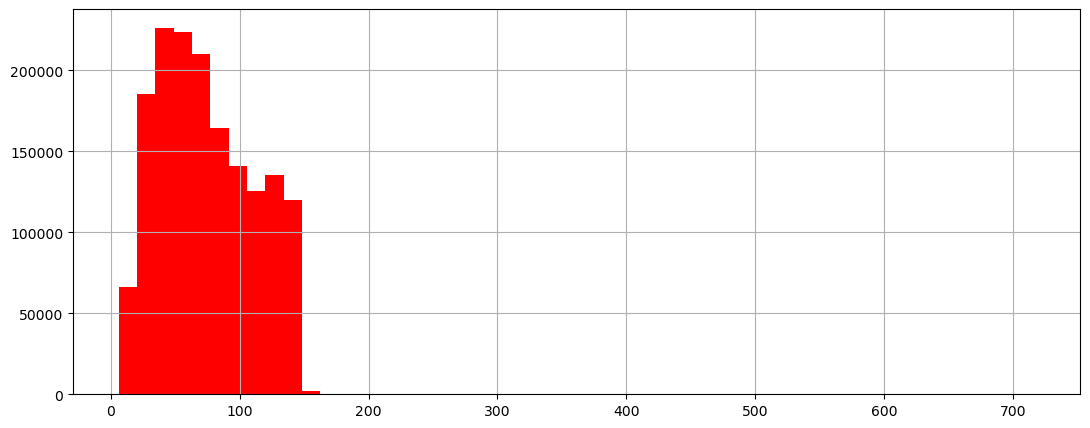

In [652]:
tweets_data["text_length"].hist(bins = 50, figsize = (13,5), color = 'r')

<Axes: >

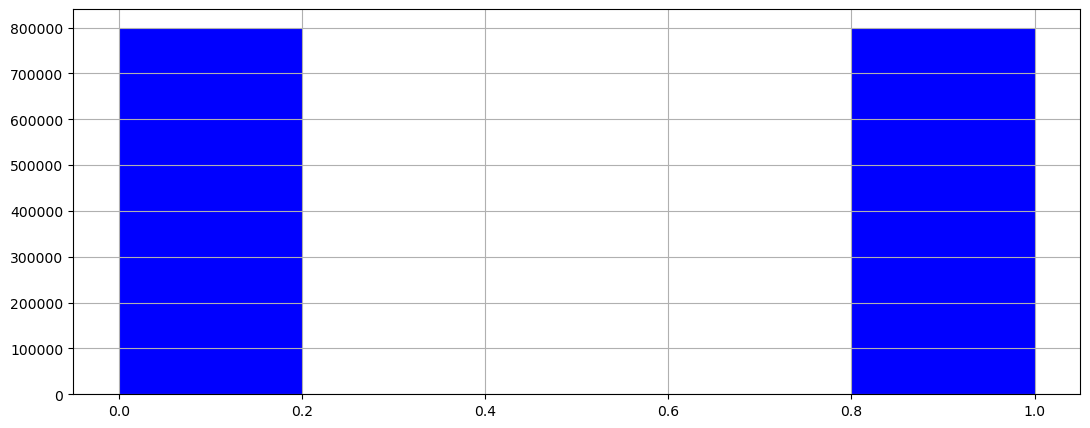

In [653]:
tweets_data["Target"].hist(bins = 5, figsize = (13,5), color = 'b')

In [654]:
# My Dataset is very Large to perform Analysis I'm using just a subset form it

In [655]:
tweets_data['tweet_created'] = pd.to_datetime(tweets_data['date']).dt.date
numberoftweets = tweets_data.groupby('tweet_created').size()
numberoftweets = numberoftweets.reset_index()
numberoftweets.columns = ['Date', 'Count']
numberoftweets

/tmp/ipykernel_5457/1907819345.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  tweets_data['tweet_created'] = pd.to_datetime(tweets_data['date']).dt.date


,Date,Count
0,2009-04-06,3359
1,2009-04-07,17311
2,2009-04-17,3084
3,2009-04-18,21754
4,2009-04-19,27469
5,2009-04-20,18460
6,2009-04-21,8587
7,2009-05-01,7716
8,2009-05-02,27434
9,2009-05-03,35333


In [656]:
numberoftweets.Count.max() # Maximum Tweets created in One Day

111676

In [657]:
numberoftweets.Count.min() # Minimum tweets created in One Day

169

In [658]:
# Find dates with the same number of tweets
same_tweets_days = numberoftweets[numberoftweets['Count'].duplicated(keep=False)]['Date'].tolist()

print("Days with the same number of tweets:")
for day in same_tweets_days:
    print(day)

    

Days with the same number of tweets:
2009-05-23
2009-05-25


In [659]:
tweets_data['tweet_created'].nunique()

48

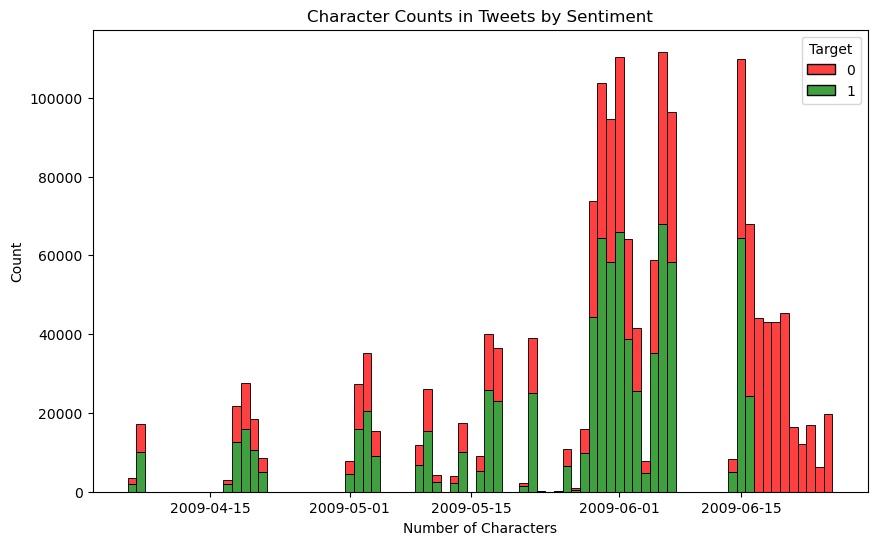

In [660]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data = tweets_data, x = 'tweet_created', hue='Target', multiple='stack', palette={0: 'red', 1: 'green'})
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.title('Character Counts in Tweets by Sentiment')
plt.show()

/tmp/ipykernel_5457/3614696218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numberoftweets.Count, y=numberoftweets.Date, data=numberoftweets, palette=color, legend=False)


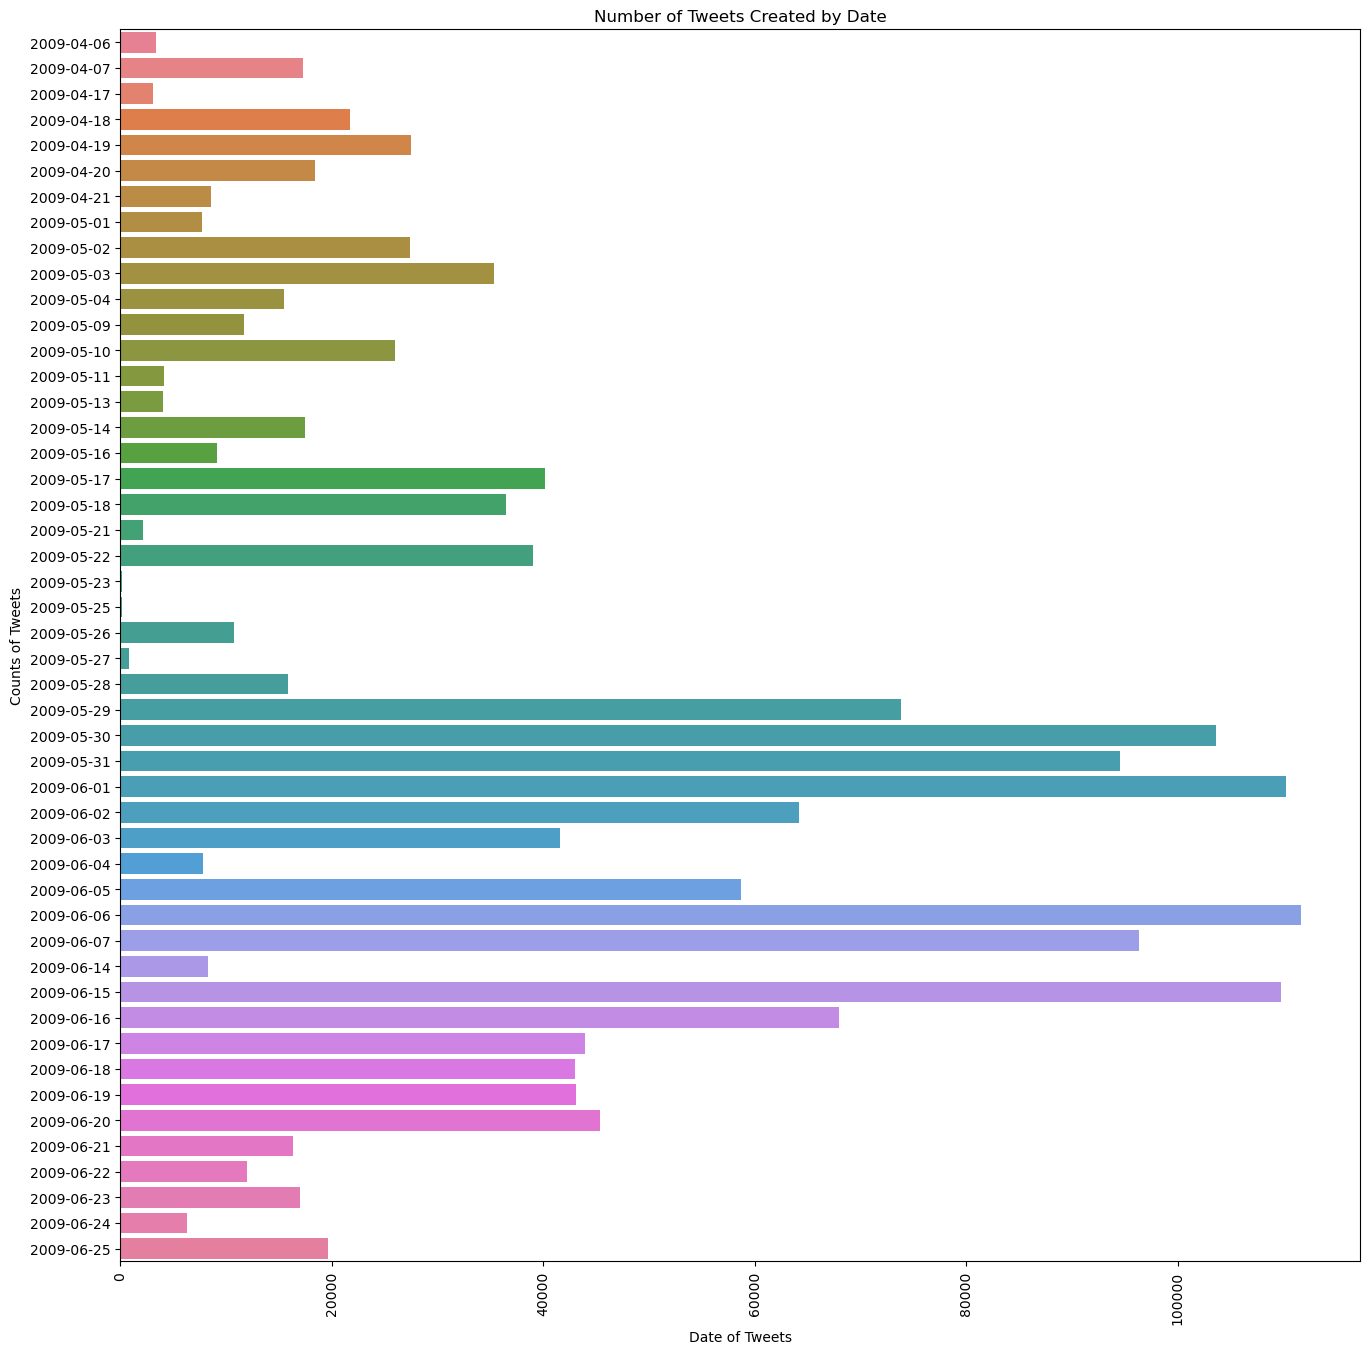

In [661]:
plt.figure(figsize=(16, 16))
tweetcreated= tweets_data['tweet_created']
color = sns.color_palette( "husl", len(numberoftweets))
sns.barplot(x=numberoftweets.Count, y=numberoftweets.Date, data=numberoftweets, palette=color, legend=False)
plt.title('Number of Tweets Created by Date')
plt.ylabel("Counts of Tweets")
plt.xlabel("Date of Tweets")
plt.xticks(rotation=90)
plt.show()

# Sampling Data Set

##### Data set contain millions of tweets. So i'm take few samples bcz it will lots of time to train. I used whole Dataset it took almost 40 mints in text processing. You can try Whole Dataset.

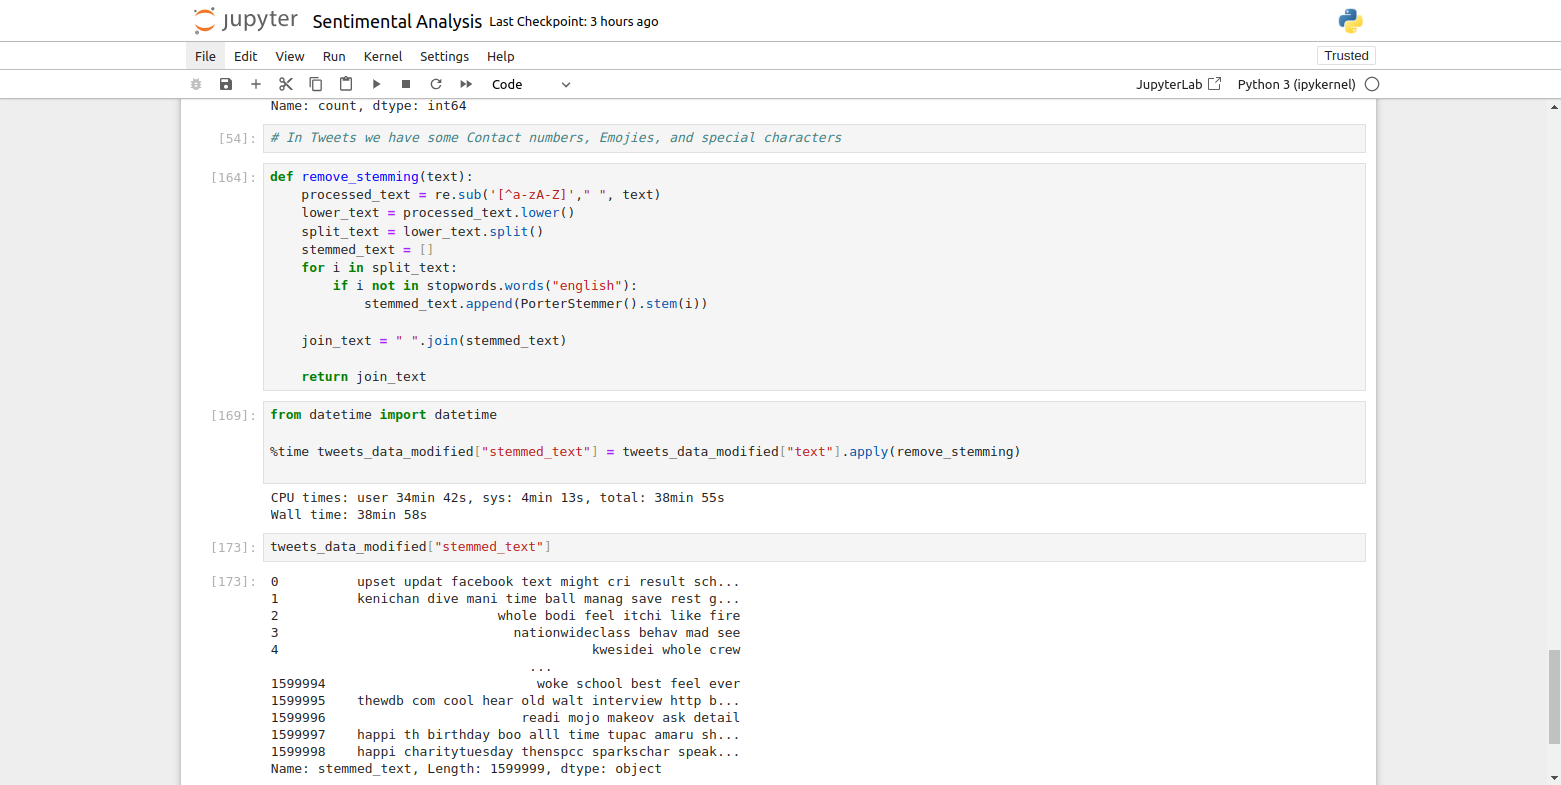

In [664]:
sample_data = original_data.sample(50000)

In [665]:
sample_data.head(10)

,Target,ids,date,flag,user,text
1442958,4,2062053422,Sat Jun 06 22:13:19 PDT 2009,NO_QUERY,KellyG5,http://twitpic.com/1uoev - ha ha what are you ...
34148,0,1564713481,Mon Apr 20 04:39:20 PDT 2009,NO_QUERY,cl4irethomas,@AnnieC1 could do with some sympathy ... she's...
789182,0,2325319004,Thu Jun 25 05:13:08 PDT 2009,NO_QUERY,acullenatheart,my iPhone is attempting to kill itself. Can't ...
724967,0,2262207910,Sat Jun 20 22:04:45 PDT 2009,NO_QUERY,locn,Zion and Vegas was so much awesomeness. Too ba...
956955,4,1825348470,Sun May 17 05:21:54 PDT 2009,NO_QUERY,CarlaJaynee,"Aww, 100 followers! I feel loved I love you g..."
1302924,4,2008849072,Tue Jun 02 14:45:17 PDT 2009,NO_QUERY,salihagul,missing my daddio and laughing with him. i get...
1237897,4,1993141661,Mon Jun 01 09:53:57 PDT 2009,NO_QUERY,Janoita,Mmmm snickers ice cream
1293666,4,2003248623,Tue Jun 02 06:10:33 PDT 2009,NO_QUERY,Tehlem0n,@jessicatsang Im on study leave. Only have to ...
1057833,4,1962815334,Fri May 29 11:43:15 PDT 2009,NO_QUERY,katiePEACE,Ahahaha helping my uncle move hopfully hannah ...
312714,0,2001586656,Tue Jun 02 01:22:51 PDT 2009,NO_QUERY,mealienprobeu,Another financial dispute with my mother that ...


In [666]:
sample_data.tail(10)

,Target,ids,date,flag,user,text
618693,0,2227618214,Thu Jun 18 13:25:24 PDT 2009,NO_QUERY,JGXO,"Jus about ready, then off to IKEA w/ one of my..."
477042,0,2178055311,Mon Jun 15 07:07:38 PDT 2009,NO_QUERY,itskb,the john lennon new york years exibit at the r...
1022957,4,1882912212,Fri May 22 07:41:48 PDT 2009,NO_QUERY,LeoWolfe,@xClureBearx thanks for the follow.
771971,0,2302595827,Tue Jun 23 17:01:48 PDT 2009,NO_QUERY,bobbysgirl1972,I have had the hiccups for the past 4 1/2 hrs....
205948,0,1973005538,Sat May 30 10:17:46 PDT 2009,NO_QUERY,sethu_j,"why do no shops do gorgeous, big bags nowadays"
1033361,4,1955775749,Thu May 28 20:36:19 PDT 2009,NO_QUERY,admance,"@artfanatic411 Yes, I did...Twitterholic is my..."
1413067,4,2056772328,Sat Jun 06 11:45:54 PDT 2009,NO_QUERY,Irv25,@David_DB your welcome!!!
416893,0,2061407079,Sat Jun 06 20:48:16 PDT 2009,NO_QUERY,kulex,Aww shit. Why did I decide to watch Grave of t...
812540,4,1548528643,Fri Apr 17 21:12:19 PDT 2009,NO_QUERY,xCAROxx,i love movies with sexy people in them. theyr...
496806,0,2185683159,Mon Jun 15 17:45:00 PDT 2009,NO_QUERY,oliviaistaken,Going to tweet all I can before &quot;Downtime...


In [667]:
sample_data.sample(10)

,Target,ids,date,flag,user,text
32249,0,1564211797,Mon Apr 20 02:21:01 PDT 2009,NO_QUERY,vspijker,Back at work........ again tomorrow going to...
844138,4,1564005659,Mon Apr 20 01:17:35 PDT 2009,NO_QUERY,Rullet,@AMPRGROUP My street album free download http:...
93488,0,1770676922,Mon May 11 21:57:12 PDT 2009,NO_QUERY,sugarstar80,So fed up the Canucks are out of the playoffs....
1312056,4,2013576880,Tue Jun 02 23:01:16 PDT 2009,NO_QUERY,Lupeezy,My phone is Gona sleep before i do! Empress ke...
194912,0,1970391719,Sat May 30 03:40:50 PDT 2009,NO_QUERY,karmachord,@RedMummy I know what a fool I am!
1079699,4,1968116955,Fri May 29 20:47:28 PDT 2009,NO_QUERY,MrsDawkins,@niyana where the link homie y do i feel we ...
799299,0,2328936546,Thu Jun 25 10:09:37 PDT 2009,NO_QUERY,Tingbabe,not feeling good at all
705462,0,2256369245,Sat Jun 20 12:40:16 PDT 2009,NO_QUERY,_Catalyst,@xanderkitty OMG you poor thing. I would have ...
550302,0,2202875683,Tue Jun 16 22:34:55 PDT 2009,NO_QUERY,chekkacuomova,@sergeantkero are you using mac or windows? I ...
69188,0,1693179792,Sun May 03 21:47:07 PDT 2009,NO_QUERY,eltah_08,@RealPaulJohnson it's always somethin wit u. ...


In [668]:
sample_data.replace({"Target":{4:1}}, inplace = True)

In [669]:
# Removing the URl
def rem_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Removing the stepwords 'english'
def rem_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Removing the html  
def rem_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_at_mentions(text):
    return re.sub(r'@\w+', '', text)


# Removing emojis by codes
def rem_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF" 
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Fixing the text
def fixing(text):
    text = re.sub(r"Mr\'s", " he is", text)
    text = re.sub(r"Mr\'.", " he is", text)
    text = re.sub(r"Ms\'.", " She ", text)
    text = re.sub(r"She\'s", " she is", text)
    text = re.sub(r"I\'m", " i am", text)
    text = re.sub(r"haven\'t", " have not", text)
    text = re.sub(r"you\'r", " you are", text)
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r" plz", " please", text)
    text = re.sub(r"it\'s", " its", text) 
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"He\'s", " he is", text)
    text = re.sub(r"in\'s", " in", text)
    return text  

# Seperate alphabets
def sep_alphabets(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

sample_data['final_tweet'] = sample_data['text']

sample_data['final_tweet'] = sample_data['final_tweet'].astype(str).apply(remove_at_mentions)
sample_data['final_tweet'] = sample_data['final_tweet'].apply(lambda x : rem_url(x))
sample_data['final_tweet'] = sample_data['final_tweet'].apply(lambda x : rem_stopwords(x))
sample_data['final_tweet'] = sample_data['final_tweet'].apply(lambda x : rem_html(x))
sample_data['final_tweet'] = sample_data['final_tweet'].apply(lambda x : rem_emoji(x))
sample_data['final_tweet'] = sample_data['final_tweet'].apply(lambda x : fixing(x))
sample_data['final_tweet'] = sample_data['final_tweet'].apply(lambda x : sep_alphabets(x))
sample_data['final_tweet'] = sample_data['final_tweet'].apply(lambda x : tweet_to_words(x))
sample_data['final_tweet'] = sample_data['final_tweet'].astype(str).replace("plz", "please", regex=True)

In [670]:
sample_data

,Target,ids,date,flag,user,text,final_tweet
1442958,1,2062053422,Sat Jun 06 22:13:19 PDT 2009,NO_QUERY,KellyG5,http://twitpic.com/1uoev - ha ha what are you ...,ha ha saying lol cute eh lol
34148,0,1564713481,Mon Apr 20 04:39:20 PDT 2009,NO_QUERY,cl4irethomas,@AnnieC1 could do with some sympathy ... she's...,could sympathy work sick today offers
789182,0,2325319004,Thu Jun 25 05:13:08 PDT 2009,NO_QUERY,acullenatheart,my iPhone is attempting to kill itself. Can't ...,iphone attempting kill ca wait get home try fix
724967,0,2262207910,Sat Jun 20 22:04:45 PDT 2009,NO_QUERY,locn,Zion and Vegas was so much awesomeness. Too ba...,zion vegas much awesomeness bad stupid camera ...
956955,1,1825348470,Sun May 17 05:21:54 PDT 2009,NO_QUERY,CarlaJaynee,"Aww, 100 followers! I feel loved I love you g...",aww followers feel loved love guys lt x
...,...,...,...,...,...,...,...
1033361,1,1955775749,Thu May 28 20:36:19 PDT 2009,NO_QUERY,admance,"@artfanatic411 Yes, I did...Twitterholic is my...",yes twitterholic middle name
1413067,1,2056772328,Sat Jun 06 11:45:54 PDT 2009,NO_QUERY,Irv25,@David_DB your welcome!!!,welcome
416893,0,2061407079,Sat Jun 06 20:48:16 PDT 2009,NO_QUERY,kulex,Aww shit. Why did I decide to watch Grave of t...,aww shit decide watch grave fireflies
812540,1,1548528643,Fri Apr 17 21:12:19 PDT 2009,NO_QUERY,xCAROxx,i love movies with sexy people in them. theyr...,love movies sexy people theyre quite delicious...


In [671]:
sample_data.head(10)

,Target,ids,date,flag,user,text,final_tweet
1442958,1,2062053422,Sat Jun 06 22:13:19 PDT 2009,NO_QUERY,KellyG5,http://twitpic.com/1uoev - ha ha what are you ...,ha ha saying lol cute eh lol
34148,0,1564713481,Mon Apr 20 04:39:20 PDT 2009,NO_QUERY,cl4irethomas,@AnnieC1 could do with some sympathy ... she's...,could sympathy work sick today offers
789182,0,2325319004,Thu Jun 25 05:13:08 PDT 2009,NO_QUERY,acullenatheart,my iPhone is attempting to kill itself. Can't ...,iphone attempting kill ca wait get home try fix
724967,0,2262207910,Sat Jun 20 22:04:45 PDT 2009,NO_QUERY,locn,Zion and Vegas was so much awesomeness. Too ba...,zion vegas much awesomeness bad stupid camera ...
956955,1,1825348470,Sun May 17 05:21:54 PDT 2009,NO_QUERY,CarlaJaynee,"Aww, 100 followers! I feel loved I love you g...",aww followers feel loved love guys lt x
1302924,1,2008849072,Tue Jun 02 14:45:17 PDT 2009,NO_QUERY,salihagul,missing my daddio and laughing with him. i get...,missing daddio laughing get funny ness joke ma...
1237897,1,1993141661,Mon Jun 01 09:53:57 PDT 2009,NO_QUERY,Janoita,Mmmm snickers ice cream,mmmm snickers ice cream
1293666,1,2003248623,Tue Jun 02 06:10:33 PDT 2009,NO_QUERY,Tehlem0n,@jessicatsang Im on study leave. Only have to ...,im study leave go school exams
1057833,1,1962815334,Fri May 29 11:43:15 PDT 2009,NO_QUERY,katiePEACE,Ahahaha helping my uncle move hopfully hannah ...,ahahaha helping uncle move hopfully hannah hel...
312714,0,2001586656,Tue Jun 02 01:22:51 PDT 2009,NO_QUERY,mealienprobeu,Another financial dispute with my mother that ...,another financial dispute mother started much ...


In [672]:
sample_data.tail(10)

,Target,ids,date,flag,user,text,final_tweet
618693,0,2227618214,Thu Jun 18 13:25:24 PDT 2009,NO_QUERY,JGXO,"Jus about ready, then off to IKEA w/ one of my...",jus ready ikea w one fav boys yayy ca much dam...
477042,0,2178055311,Mon Jun 15 07:07:38 PDT 2009,NO_QUERY,itskb,the john lennon new york years exibit at the r...,john lennon new york years exibit rock n roll ...
1022957,1,1882912212,Fri May 22 07:41:48 PDT 2009,NO_QUERY,LeoWolfe,@xClureBearx thanks for the follow.,thanks follow
771971,0,2302595827,Tue Jun 23 17:01:48 PDT 2009,NO_QUERY,bobbysgirl1972,I have had the hiccups for the past 4 1/2 hrs....,hiccups past hrs help whatta ugh
205948,0,1973005538,Sat May 30 10:17:46 PDT 2009,NO_QUERY,sethu_j,"why do no shops do gorgeous, big bags nowadays",shops gorgeous big bags nowadays
1033361,1,1955775749,Thu May 28 20:36:19 PDT 2009,NO_QUERY,admance,"@artfanatic411 Yes, I did...Twitterholic is my...",yes twitterholic middle name
1413067,1,2056772328,Sat Jun 06 11:45:54 PDT 2009,NO_QUERY,Irv25,@David_DB your welcome!!!,welcome
416893,0,2061407079,Sat Jun 06 20:48:16 PDT 2009,NO_QUERY,kulex,Aww shit. Why did I decide to watch Grave of t...,aww shit decide watch grave fireflies
812540,1,1548528643,Fri Apr 17 21:12:19 PDT 2009,NO_QUERY,xCAROxx,i love movies with sexy people in them. theyr...,love movies sexy people theyre quite delicious...
496806,0,2185683159,Mon Jun 15 17:45:00 PDT 2009,NO_QUERY,oliviaistaken,Going to tweet all I can before &quot;Downtime...,going tweet quot downtime quot


In [673]:
sample_data.sample(10)

,Target,ids,date,flag,user,text,final_tweet
37191,0,1572884527,Mon Apr 20 22:54:19 PDT 2009,NO_QUERY,meowwzer,just woke up feeling confused and anxious abou...,woke feeling confused anxious upcoming events ...
1018917,1,1882095993,Fri May 22 06:13:21 PDT 2009,NO_QUERY,JasmineYun,@Eva2Ta HAVE FUN!!! Wing big at the casino fi...,fun wing big casino first spend shopping
1109350,1,1971876299,Sat May 30 08:05:19 PDT 2009,NO_QUERY,avandenb,Washing the paint out of my hair,washing paint hair
467856,0,2175870892,Mon Jun 15 02:14:22 PDT 2009,NO_QUERY,wiga_sunshine,4 : 13 and i'm in my boring maximum time!! huu...,boring maximum time huuugghh
1326555,1,2015269953,Wed Jun 03 04:11:56 PDT 2009,NO_QUERY,xtnabcn,@AlexDeQuerzen I always have the work/play the...,always work play theory mind suggested maybe c...
110794,0,1824950118,Sun May 17 03:40:01 PDT 2009,NO_QUERY,_mayumi,lazy sunday today i think. 4 days of school le...,lazy sunday today think days school left study...
674745,0,2247880438,Fri Jun 19 19:46:00 PDT 2009,NO_QUERY,mattielong,god fucking dammit,god fucking dammit
124164,0,1834055000,Mon May 18 01:27:24 PDT 2009,NO_QUERY,supernovi,I hate gravel it has messed my car up,hate gravel messed car
190540,0,1969381829,Fri May 29 23:51:36 PDT 2009,NO_QUERY,ObamaKitty,Re-pinging @neoncat: @kay_rose I didn't eat at...,pinging eat day gt lt eat diner yesterday hung...
292041,0,1995885275,Mon Jun 01 14:11:56 PDT 2009,NO_QUERY,lexayyyy,im hungry now,im hungry


In [674]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1442958 to 496806
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Target       50000 non-null  int64 
 1   ids          50000 non-null  int64 
 2   date         50000 non-null  object
 3   flag         50000 non-null  object
 4   user         50000 non-null  object
 5   text         50000 non-null  object
 6   final_tweet  50000 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.1+ MB


In [675]:
sample_data.describe() # You can't analyze Ids and Target so use just text_length

,Target,ids
count,50000.000000,5.000000e+04
mean,0.496260,1.998724e+09
std,0.499991,1.943709e+08
min,0.000000,1.467812e+09
25%,0.000000,1.956743e+09
50%,0.000000,2.002167e+09
75%,1.000000,2.177721e+09
max,1.000000,2.329205e+09


In [676]:
sample_data.ids.duplicated().sum()

3

In [677]:
sample_data["final_text_length"] = sample_data["final_tweet"].apply(len) # After Pre-processing

In [678]:
sample_data.final_text_length

1442958    28
34148      37
789182     47
724967     60
956955     39
           ..
1033361    28
1413067     7
416893     37
812540     65
496806     30
Name: final_text_length, Length: 50000, dtype: int64

In [679]:
sample_data["text_length"] = sample_data["text"].apply(len) # Before Preporessing 

In [680]:
sample_data.text_length

1442958    91
34148      85
789182     78
724967     87
956955     57
           ..
1033361    59
1413067    26
416893     60
812540     98
496806     53
Name: text_length, Length: 50000, dtype: int64

In [681]:
max(sample_data.final_text_length)

137

In [682]:
min(sample_data.final_text_length)

0

In [683]:
sample_data["final_tweet"].str.len().min() # minimum length tweet

0

In [684]:
sample_data["final_tweet"].str.len().max() # minimum length tweet

137

In [685]:
sample_data.final_tweet.str.len().idxmin() # index of minimum lenth text

448773

In [686]:
sample_data.final_tweet.str.len().idxmax() # index of maximum lenth text

1766

In [687]:
sample_data.final_tweet[sample_data.final_tweet.str.len().idxmax()] # index of maximum lenth text

'tks pa quot tapauing quot croissant tuna knowing dat ive back back meetings since morning amp zuraidah tks buying fav starbuck mocha frap'

In [688]:
sample_data.final_tweet[sample_data.final_tweet.str.len().idxmin()] # index of minimum lenth text

''

In [689]:
sample_data

,Target,ids,date,flag,user,text,final_tweet,final_text_length,text_length
1442958,1,2062053422,Sat Jun 06 22:13:19 PDT 2009,NO_QUERY,KellyG5,http://twitpic.com/1uoev - ha ha what are you ...,ha ha saying lol cute eh lol,28,91
34148,0,1564713481,Mon Apr 20 04:39:20 PDT 2009,NO_QUERY,cl4irethomas,@AnnieC1 could do with some sympathy ... she's...,could sympathy work sick today offers,37,85
789182,0,2325319004,Thu Jun 25 05:13:08 PDT 2009,NO_QUERY,acullenatheart,my iPhone is attempting to kill itself. Can't ...,iphone attempting kill ca wait get home try fix,47,78
724967,0,2262207910,Sat Jun 20 22:04:45 PDT 2009,NO_QUERY,locn,Zion and Vegas was so much awesomeness. Too ba...,zion vegas much awesomeness bad stupid camera ...,60,87
956955,1,1825348470,Sun May 17 05:21:54 PDT 2009,NO_QUERY,CarlaJaynee,"Aww, 100 followers! I feel loved I love you g...",aww followers feel loved love guys lt x,39,57
...,...,...,...,...,...,...,...,...,...
1033361,1,1955775749,Thu May 28 20:36:19 PDT 2009,NO_QUERY,admance,"@artfanatic411 Yes, I did...Twitterholic is my...",yes twitterholic middle name,28,59
1413067,1,2056772328,Sat Jun 06 11:45:54 PDT 2009,NO_QUERY,Irv25,@David_DB your welcome!!!,welcome,7,26
416893,0,2061407079,Sat Jun 06 20:48:16 PDT 2009,NO_QUERY,kulex,Aww shit. Why did I decide to watch Grave of t...,aww shit decide watch grave fireflies,37,60
812540,1,1548528643,Fri Apr 17 21:12:19 PDT 2009,NO_QUERY,xCAROxx,i love movies with sexy people in them. theyr...,love movies sexy people theyre quite delicious...,65,98


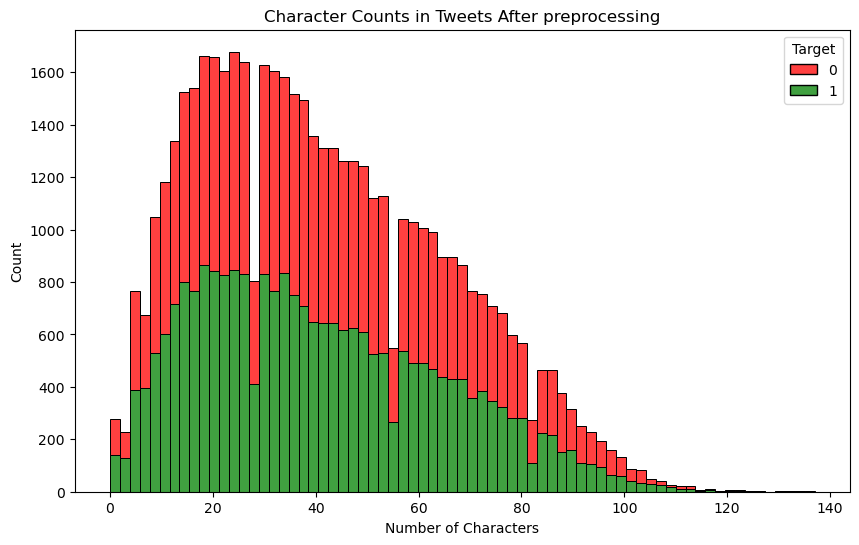

In [690]:

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=sample_data, x='final_text_length', hue='Target', multiple='stack', palette={0: 'red', 1: 'green'})
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.title('Character Counts in Tweets After preprocessing')
plt.show()

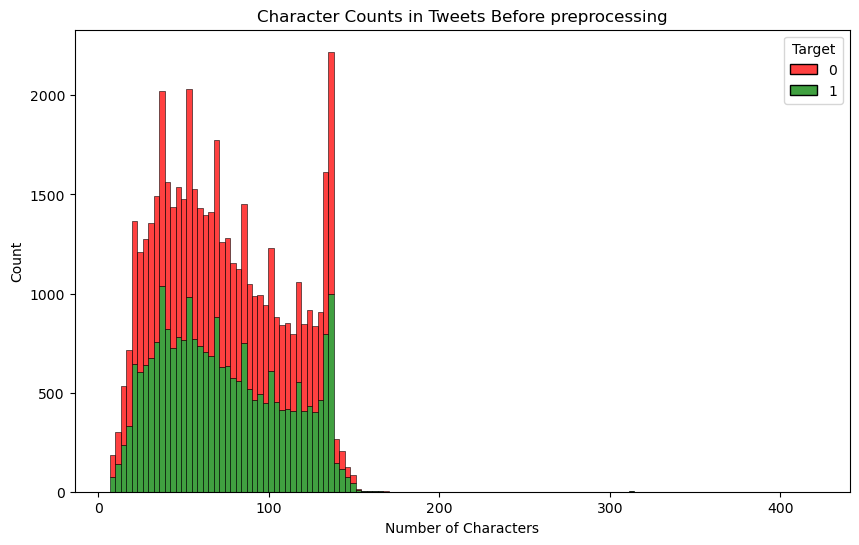

In [691]:

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=sample_data, x='text_length', hue='Target', multiple='stack', palette={0: 'red', 1: 'green'})
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.title('Character Counts in Tweets Before preprocessing')
plt.show()

In [692]:
sample_data.isnull().sum()

Target               0
ids                  0
date                 0
flag                 0
user                 0
text                 0
final_tweet          0
final_text_length    0
text_length          0
dtype: int64

In [693]:
sample_data["date"].min() # First tweet 

'Fri Apr 17 20:31:46 PDT 2009'

In [694]:
sample_data.date.max() # Last Tweet

'Wed May 27 07:27:36 PDT 2009'

<Axes: xlabel='Target'>

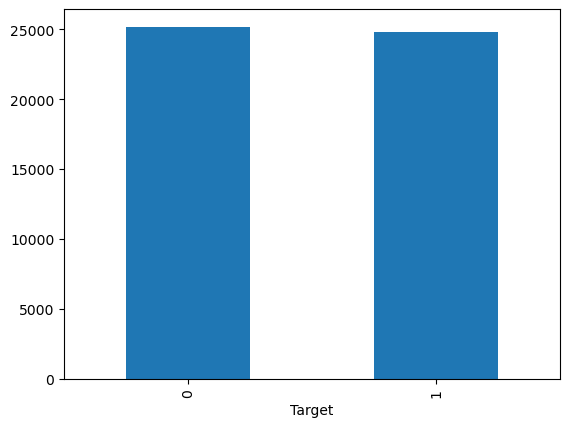

In [695]:
sample_data.groupby('Target').size().plot(kind='bar')

In [696]:
sample_data["Target"].value_counts()

Target
0    25187
1    24813
Name: count, dtype: int64

<Axes: xlabel='Target'>

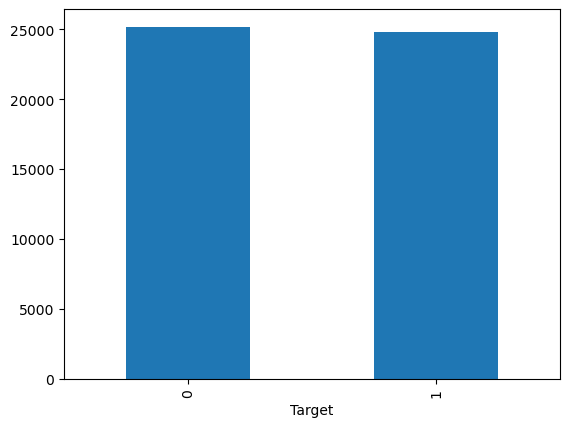

In [697]:
sample_data["Target"].value_counts().plot(kind="bar")

In [698]:
# As in Data set there is No "2" Neutral. So lets change 4 to 1

In [699]:
# using_data.replace({"Target":{4:1}}, inplace = True)

In [700]:
sample_data

,Target,ids,date,flag,user,text,final_tweet,final_text_length,text_length
1442958,1,2062053422,Sat Jun 06 22:13:19 PDT 2009,NO_QUERY,KellyG5,http://twitpic.com/1uoev - ha ha what are you ...,ha ha saying lol cute eh lol,28,91
34148,0,1564713481,Mon Apr 20 04:39:20 PDT 2009,NO_QUERY,cl4irethomas,@AnnieC1 could do with some sympathy ... she's...,could sympathy work sick today offers,37,85
789182,0,2325319004,Thu Jun 25 05:13:08 PDT 2009,NO_QUERY,acullenatheart,my iPhone is attempting to kill itself. Can't ...,iphone attempting kill ca wait get home try fix,47,78
724967,0,2262207910,Sat Jun 20 22:04:45 PDT 2009,NO_QUERY,locn,Zion and Vegas was so much awesomeness. Too ba...,zion vegas much awesomeness bad stupid camera ...,60,87
956955,1,1825348470,Sun May 17 05:21:54 PDT 2009,NO_QUERY,CarlaJaynee,"Aww, 100 followers! I feel loved I love you g...",aww followers feel loved love guys lt x,39,57
...,...,...,...,...,...,...,...,...,...
1033361,1,1955775749,Thu May 28 20:36:19 PDT 2009,NO_QUERY,admance,"@artfanatic411 Yes, I did...Twitterholic is my...",yes twitterholic middle name,28,59
1413067,1,2056772328,Sat Jun 06 11:45:54 PDT 2009,NO_QUERY,Irv25,@David_DB your welcome!!!,welcome,7,26
416893,0,2061407079,Sat Jun 06 20:48:16 PDT 2009,NO_QUERY,kulex,Aww shit. Why did I decide to watch Grave of t...,aww shit decide watch grave fireflies,37,60
812540,1,1548528643,Fri Apr 17 21:12:19 PDT 2009,NO_QUERY,xCAROxx,i love movies with sexy people in them. theyr...,love movies sexy people theyre quite delicious...,65,98


# Working On model Implementation

In [702]:
X = sample_data["final_tweet"]
Y = sample_data["Target"]

In [703]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify = Y, random_state = 42)

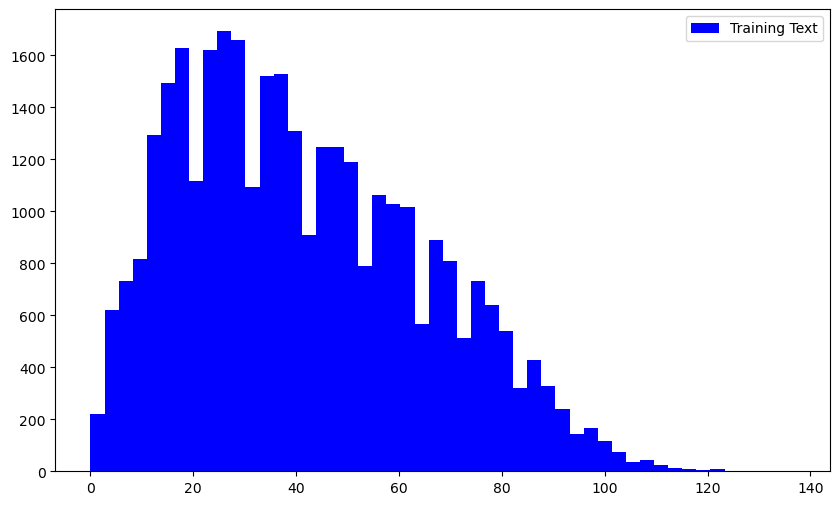

In [704]:
length_train = X_train.str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Training Text", color = "blue")
plt.legend()

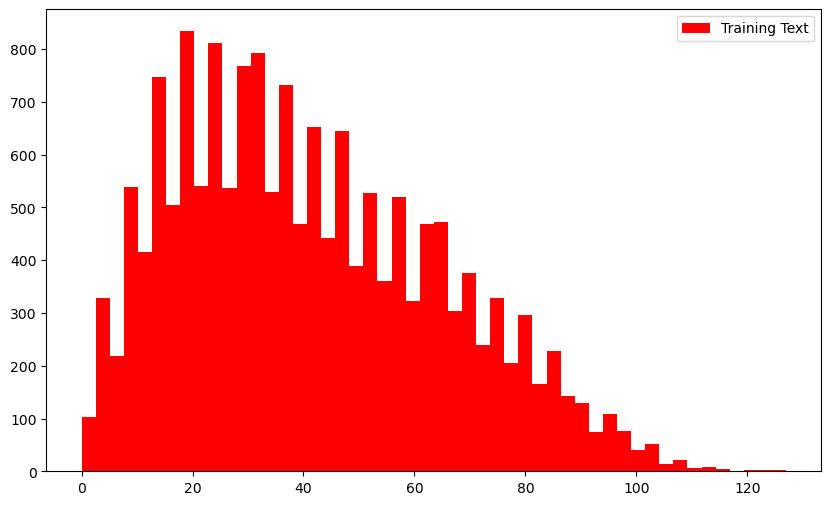

In [705]:
length_test = X_test.str.len()
plt.figure(figsize=(10,6))
plt.hist(length_test, bins=50, label="Training Text", color = "red")
plt.legend()

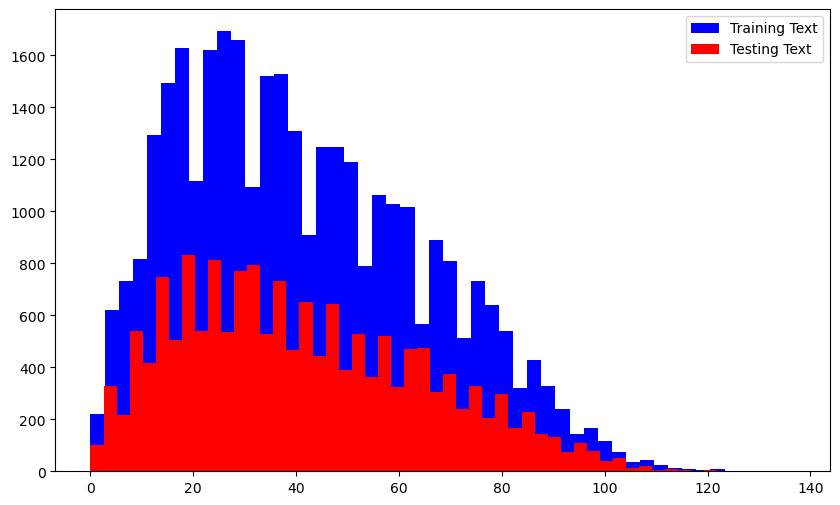

In [706]:
length_train = X_train.str.len()
length_test = X_test.str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label='Training Text', color = "blue")
plt.hist(length_test, bins=50, label='Testing Text', color = "red")
plt.legend()

In [707]:
sample_data

,Target,ids,date,flag,user,text,final_tweet,final_text_length,text_length
1442958,1,2062053422,Sat Jun 06 22:13:19 PDT 2009,NO_QUERY,KellyG5,http://twitpic.com/1uoev - ha ha what are you ...,ha ha saying lol cute eh lol,28,91
34148,0,1564713481,Mon Apr 20 04:39:20 PDT 2009,NO_QUERY,cl4irethomas,@AnnieC1 could do with some sympathy ... she's...,could sympathy work sick today offers,37,85
789182,0,2325319004,Thu Jun 25 05:13:08 PDT 2009,NO_QUERY,acullenatheart,my iPhone is attempting to kill itself. Can't ...,iphone attempting kill ca wait get home try fix,47,78
724967,0,2262207910,Sat Jun 20 22:04:45 PDT 2009,NO_QUERY,locn,Zion and Vegas was so much awesomeness. Too ba...,zion vegas much awesomeness bad stupid camera ...,60,87
956955,1,1825348470,Sun May 17 05:21:54 PDT 2009,NO_QUERY,CarlaJaynee,"Aww, 100 followers! I feel loved I love you g...",aww followers feel loved love guys lt x,39,57
...,...,...,...,...,...,...,...,...,...
1033361,1,1955775749,Thu May 28 20:36:19 PDT 2009,NO_QUERY,admance,"@artfanatic411 Yes, I did...Twitterholic is my...",yes twitterholic middle name,28,59
1413067,1,2056772328,Sat Jun 06 11:45:54 PDT 2009,NO_QUERY,Irv25,@David_DB your welcome!!!,welcome,7,26
416893,0,2061407079,Sat Jun 06 20:48:16 PDT 2009,NO_QUERY,kulex,Aww shit. Why did I decide to watch Grave of t...,aww shit decide watch grave fireflies,37,60
812540,1,1548528643,Fri Apr 17 21:12:19 PDT 2009,NO_QUERY,xCAROxx,i love movies with sexy people in them. theyr...,love movies sexy people theyre quite delicious...,65,98


In [714]:
X = sample_data["final_tweet"]
Y = sample_data["Target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify = Y, random_state = 42)

In [716]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [718]:
print(X_train)

  (0, 4750)	0.285336446729736
  (0, 13684)	0.3571419903170213
  (0, 15232)	0.41077986959540397
  (0, 679)	0.2536745622290616
  (0, 24914)	0.30743056300545
  (0, 24298)	0.30743056300545
  (0, 23746)	0.1755829535811562
  (0, 23667)	0.23216643872413337
  (0, 14500)	0.4201237923198626
  (0, 26286)	0.2565214670876748
  (0, 15160)	0.20463829354561308
  (1, 1538)	0.7057499015330406
  (1, 26638)	0.708461062081822
  (2, 2025)	0.1809951294187414
  (2, 13615)	0.16661832522136755
  (2, 25467)	0.2884551139570287
  (2, 17752)	0.3083834631458847
  (2, 25839)	0.3083834631458847
  (2, 23941)	0.22154464518925604
  (2, 13748)	0.2034251018597497
  (2, 18675)	0.5605181479153221
  (2, 6031)	0.26852676476817267
  (2, 10298)	0.3083834631458847
  (2, 14010)	0.24521209081465745
  (2, 8249)	0.18463930820371377
  :	:
  (33495, 17475)	0.6806719696195248
  (33496, 11714)	0.4274372425922687
  (33496, 14754)	0.4496949679040325
  (33496, 4542)	0.2735308908606615
  (33496, 25838)	0.3523727510616534
  (33496, 7347)	0.28

In [720]:
print(X_test)

  (0, 22263)	0.424269200240435
  (0, 22250)	0.42714900686286034
  (0, 19900)	0.37114276033781674
  (0, 16368)	0.25543338875565047
  (0, 13463)	0.4636078656721006
  (0, 9984)	0.27011334705212664
  (0, 4631)	0.3829526519718875
  (1, 13782)	0.3219855368734756
  (1, 9207)	0.5556371646069063
  (1, 6490)	0.6053330674484935
  (1, 3483)	0.4702813336772944
  (2, 22266)	0.429223995777511
  (2, 21657)	0.24893320814803294
  (2, 17959)	0.48636034389004223
  (2, 16416)	0.31506174819544536
  (2, 13716)	0.20609627630349428
  (2, 9641)	0.36796540147042495
  (2, 9361)	0.30431548572166334
  (2, 3542)	0.3840658842043067
  (3, 25799)	0.5371959133350348
  (3, 21617)	0.6343218840433256
  (3, 10800)	0.555928321026968
  (4, 26491)	0.24329626112187816
  (4, 25815)	0.3936682943589734
  (4, 25219)	0.2605252598641996
  :	:
  (16494, 4411)	0.38609042754700823
  (16495, 23613)	0.2356066948788948
  (16495, 14881)	0.32331787856349326
  (16495, 12174)	0.4664626217278268
  (16495, 10800)	0.5200245255865704
  (16495, 972

In [725]:
lg = LogisticRegression(max_iter = 1000)
lg.fit(X_train, Y_train)
X_train_predict = lg.predict(X_train)
print("SVM Accuracy Training Data:",accuracy_score(Y_train, X_train_predict))

SVM Accuracy Training Data: 0.8317910447761194


In [746]:
# Accuracy 
X_test_predict = lg.predict(X_test)
print("SVM Accuracy Tresting Data:",accuracy_score(Y_test, X_test_predict))

SVM Accuracy Tresting Data: 0.7531515151515151


In [724]:
# Training Data
svm = SVC()
svm.fit(X_train, Y_train)
X_train_predict = svm.predict(X_train)
print("SVM Accuracy Training Data:", accuracy_score(Y_train, X_train_predict))
print("SVM Classification Report:\n", classification_report(Y_train, X_train_predict))

SVM Accuracy Training Data: 0.9574626865671642
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     16875
           1       0.96      0.95      0.96     16625

    accuracy                           0.96     33500
   macro avg       0.96      0.96      0.96     33500
weighted avg       0.96      0.96      0.96     33500



In [748]:
# Testing Data
svm = SVC()
svm.fit(X_train, Y_train)
X_test_predict = svm.predict(X_test)
print("SVM Accuracy Testing Data:", accuracy_score(Y_test, X_test_predict))
print("SVM Classification Report:\n", classification_report(Y_test, X_test_predict))

SVM Accuracy Testing Data: 0.7519393939393939
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      8312
           1       0.75      0.76      0.75      8188

    accuracy                           0.75     16500
   macro avg       0.75      0.75      0.75     16500
weighted avg       0.75      0.75      0.75     16500



In [749]:
# Training Data
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
X_train_predict = dt.predict(X_train)
print("Decision Tree Accuracy Training Data", accuracy_score(Y_train, X_train_predict))
print("Decision Tree Classification Report:\n", classification_report(Y_train, X_train_predict))

Decision Tree Accuracy Training Data 0.9932835820895523
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16875
           1       1.00      0.99      0.99     16625

    accuracy                           0.99     33500
   macro avg       0.99      0.99      0.99     33500
weighted avg       0.99      0.99      0.99     33500



In [750]:
# Testing Data
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
X_test_predict = dt.predict(X_test)
print("Decision Tree Accuracy Testing Data", accuracy_score(Y_test, X_test_predict))
print("Decision Tree Classification Report:\n", classification_report(Y_test, X_test_predict))

Decision Tree Accuracy Testing Data 0.6803030303030303
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      8312
           1       0.69      0.65      0.67      8188

    accuracy                           0.68     16500
   macro avg       0.68      0.68      0.68     16500
weighted avg       0.68      0.68      0.68     16500



In [751]:
# Training Data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
X_train_predict = knn.predict(X_train)
print("Decision Tree Accuracy Training Data", accuracy_score(Y_train, X_train_predict))
print("Decision Tree Classification Report:\n", classification_report(Y_train, X_train_predict))

Decision Tree Accuracy Training Data 0.726089552238806
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73     16875
           1       0.72      0.74      0.73     16625

    accuracy                           0.73     33500
   macro avg       0.73      0.73      0.73     33500
weighted avg       0.73      0.73      0.73     33500



In [752]:
# Testing Data
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
X_test_predict = knn.predict(X_test)
print("KNN Accuracy Testing Data:", accuracy_score(Y_test, X_test_predict))
print("KNN Classification Report:\n", classification_report(Y_test, X_test_predict))

KNN Accuracy Testing Data: 0.5696969696969697
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57      8312
           1       0.56      0.58      0.57      8188

    accuracy                           0.57     16500
   macro avg       0.57      0.57      0.57     16500
weighted avg       0.57      0.57      0.57     16500



In [753]:
# Training Data
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, Y_train)
X_train_predict = xgb.predict(X_train)
print("XGBoost Accuracy Training Data:", accuracy_score(Y_train, X_train_predict))
print("XGBoost Classification Report:\n", classification_report(Y_train, X_train_predict))

/home/ubuntu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy Training Data: 0.7711044776119403
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75     16875
           1       0.73      0.86      0.79     16625

    accuracy                           0.77     33500
   macro avg       0.78      0.77      0.77     33500
weighted avg       0.78      0.77      0.77     33500



In [754]:
# Testing Data
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, Y_train)
X_test_predict = xgb.predict(X_test)
print("XGBoost Accuracy Testing:", accuracy_score(Y_test, X_test_predict))
print("XGBoost Classification Report:\n", classification_report(Y_test, X_test_predict))

/home/ubuntu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:50:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy Testing: 0.7246060606060606
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.64      0.70      8312
           1       0.69      0.81      0.74      8188

    accuracy                           0.72     16500
   macro avg       0.73      0.73      0.72     16500
weighted avg       0.73      0.72      0.72     16500



In [755]:
# Training Data
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
X_train_predict_rf = rf.predict(X_train)

# Evaluate the model on the training data
print("Random Forest Accuracy on Training Data:", accuracy_score(Y_train, X_train_predict_rf))
print("Random Forest Classification Report on Training Data:\n", classification_report(Y_train, X_train_predict_rf))

Random Forest Accuracy on Training Data: 0.9932835820895523
Random Forest Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     16875
           1       1.00      0.99      0.99     16625

    accuracy                           0.99     33500
   macro avg       0.99      0.99      0.99     33500
weighted avg       0.99      0.99      0.99     33500



In [756]:
# Testing Data
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
X_test_predict = rf.predict(X_test)

# Evaluate the model on the training data
print("Random Forest Accuracy on Training Data:", accuracy_score(Y_test, X_test_predict))
print("Random Forest Classification Report on Training Data:\n", classification_report(Y_test, X_test_predict))

Random Forest Accuracy on Training Data: 0.7333939393939394
Random Forest Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      8312
           1       0.74      0.71      0.73      8188

    accuracy                           0.73     16500
   macro avg       0.73      0.73      0.73     16500
weighted avg       0.73      0.73      0.73     16500



In [757]:
#######################################logistic_regressio

In [758]:
# Saving Model for Future use Im just saving Logistic Regression Model

In [759]:
import pickle

In [760]:
save_model_lg = 'trained_Model_logistic_regression.sav'
pickle.dump(lg, open(save_model_lg, "wb"))

In [761]:
save_model_xgb = 'trained_Model_XGBoost.sav'
pickle.dump(xgb, open(save_model_xgb, "wb"))

In [762]:
save_model_rf = 'trained_Model_Random_Forest.sav'
pickle.dump(rf, open(save_model_rf, "wb"))

In [763]:
save_model_knn = 'trained_Model_KNN.sav'
pickle.dump(knn, open(save_model_knn, "wb"))

In [764]:
save_model_svm = 'trained_Model_SVM.sav'
pickle.dump(svm, open(save_model_svm, "wb"))

In [765]:
save_model_dt = 'trained_Model_DT.sav'
pickle.dump(dt, open(save_model_dt, "wb"))

In [766]:
load_saved_model = pickle.load(open(save_model_dt, "rb")) # loading models

In [767]:
ls

 nltk_data/                                 trained_Model_Random_Forest.sav
'Screenshot from 2024-06-30 01-59-16.png'   trained_Model.sav
'Sentimental Analysis.ipynb'                trained_Model_SVM.sav
 trained_Model_DT.sav                       trained_Model_XGBoost.sav
 trained_Model_KNN.sav                      tweets.csv
 trained_Model_logistic_regression.sav      tweets.zip


In [772]:
new_input = X_test[29]

In [774]:
predict = load_saved_model.predict(new_input)

if predict[0] == 0:
    print("-ve Tweet")
else:
    print("+ve Tweet")

-ve Tweet


In [778]:
predict = lg.predict(new_input)

if predict[0] == 0:
    print("-ve Tweet")
else:
    print("+ve Tweet")

-ve Tweet


<h1> ---------------------------------------- The End-----------------------------------</h1> 